In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import pickle
import json

import warnings
warnings.filterwarnings("ignore")

### 1.Problem Statement

### 2.Data Gathering

In [6]:
df = pd.read_csv("shopping_data.csv")
df

,CustomerID,Gender,Age,Annual_Income ($),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### 3.Exploratory Data Analysis(EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         200 non-null    int64 
 1   Gender             200 non-null    object
 2   Age                200 non-null    int64 
 3   Annual_Income ($)  200 non-null    int64 
 4   Spending Score     200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         200 non-null    int64 
 1   Gender             200 non-null    object
 2   Age                200 non-null    int64 
 3   Annual_Income ($)  200 non-null    int64 
 4   Spending Score     200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 4. Feature Engineering

#### 1.Gender

In [ ]:
df['Gender']

In [ ]:
df['Gender'].value_counts()

In [10]:
df['Gender'].replace({'Male':1, 'Female':0},inplace = True)

In [11]:
Gender_data= {'male':1, 'female':0}

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CustomerID         200 non-null    int64
 1   Gender             200 non-null    int64
 2   Age                200 non-null    int64
 3   Annual_Income ($)  200 non-null    int64
 4   Spending Score     200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


### 5. Feature Selection/Extraction

##### 1.Linearity

In [29]:
df.corr()

,CustomerID,Gender,Age,Annual_Income ($),Spending Score
CustomerID,1.000000,0.057400,-0.026763,0.977548,-0.073719
Gender,0.057400,1.000000,0.060867,0.056410,-0.051640
Age,-0.026763,0.060867,1.000000,-0.012398,-0.280943
Annual_Income ($),0.977548,0.056410,-0.012398,1.000000,-0.078826
Spending Score,-0.073719,-0.051640,-0.280943,-0.078826,1.000000


<Axes: >

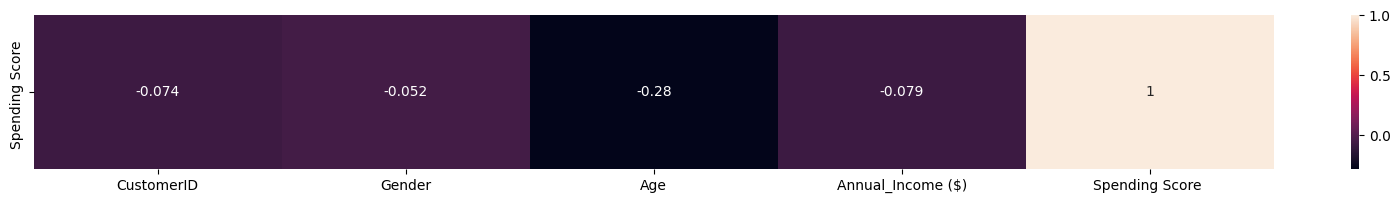

In [14]:
plt.figure(figsize = (20,2))
sns.heatmap(df.corr().tail(1), annot = True)

### Model Training

In [15]:
x = df.drop('Spending Score ', axis = 1)
y = df['Spending Score ']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [16]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

### Evaluation

In [17]:
y_pred = linear_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared :",r2_value)

RMSE : 25.58802804661292
MAE : 21.894882573004356
R-Squared : 0.11714819189653913


In [28]:
y_pred_train = linear_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)

print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train, y_pred_train )
print("R-Squared :",r2_value)

RMSE : 23.817573925723394
MAE : 19.367702029415646
R-Squared : 0.06632240974155534


#### Single Row Testing

In [27]:
x_test[5:6]

,CustomerID,Gender,Age,Annual_Income ($)
182,183,1,46,98


In [20]:
linear_reg.predict(x_test[5:6])[0]

43.14910280592107

In [21]:
column_names = x.columns.tolist()
column_names

['CustomerID', 'Gender', 'Age', 'Annual_Income ($)']

In [22]:
x.shape[1]

4

In [23]:
CustomerID=10
Gender='male'
Age=20
Annual_Income = 25    

Gender=Gender_data[Gender]
test_array = np.zeros([1,linear_reg.n_features_in_])
test_array[0,0] = CustomerID
test_array[0,1] = Gender
test_array[0,2] =Age
test_array[0,3] = Annual_Income


predict_spendings=np.around(linear_reg.predict(test_array)[0],3)

In [24]:
with open('linear_regression.pkl','wb') as f:
    pickle.dump(linear_reg, f)

In [25]:
project_data = {"Gender": Gender_data,
               
               "Column Names" : column_names}

with open('proj_data.json','w') as f:
    json.dump(project_data, f)